In [192]:
import numpy
import pandas
import scipy.signal

from matplotlib import pyplot as plt

## Example problem

We use as an example a system which we model as having 3 distinct states:

- s1 (low values)
- s2 (medium values)
- s3 (high values)

And we want that when going from low to high, the values will go through medium state.
But when moving from high to low, the medium state shall not be included.

For this example we will use a toy synthetic dataset.

The approach shown should work just as well for other HMMs, be it multi-variate GMMs, Poission emissions, discrete

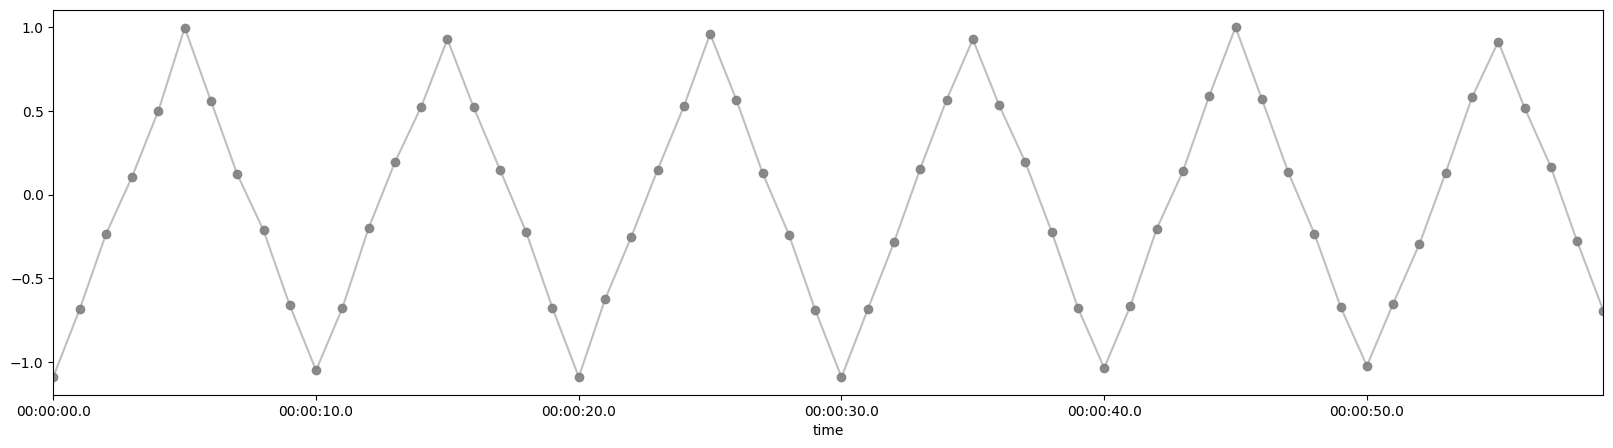

In [213]:

def sinewave(freq, duration, samplerate):
    sin = numpy.sin(2*numpy.pi*(freq/samplerate)*t)
    return sin, t

def triangle(freq, duration, samplerate, phase=0.5):

    t = numpy.arange(samplerate*duration)
    triangle = scipy.signal.sawtooth(2*numpy.pi*freq*(t/samplerate), phase)
    return triangle, t
    
def make_series(shape='triangle', period='10sec', freq='1sec', duration='1min'):
    period = pandas.Timedelta(period)
    duration = pandas.Timedelta(duration)
    freq = pandas.Timedelta(freq)
    
    if shape == 'sine':
        w = sinewave(1/period.total_seconds(), duration.total_seconds(), freq.total_seconds())
    elif shape == 'triangle':
        w = triangle(1/period.total_seconds(), duration.total_seconds(), freq.total_seconds())
    else:
        raise ValueError(f"Unknown shape '{shape}'")
    y, t = w
    y = y + (-.1 * numpy.random.random(size=len(y)) )
    #y = 0
    t = pandas.to_timedelta(t, unit='s')
    s = pandas.Series(y, index=t)
    s.index.name = 'time'
    return s

def plot_data(X, states=None, title=''):
    fig, ax = plt.subplots(1, figsize=(20, 5))
    fig.suptitle(title)

    # Plot data
    X.plot(ax=ax, marker='o', ls='none', color='grey', alpha=0.9)
    X.plot(ax=ax, ls='-', alpha=0.5, color='grey')

    # Plot states
    # FIXME: use one color per state
    if states is not None:
        ax2 = ax.twinx()
        n_states = len(numpy.unique(states))
        for s_no in range(n_states):
            states[states == s_no].plot(ax=ax2,ls='none', marker='o', ms=5, label=f's{s_no}')
        ax2.legend()
            
X = make_series(period='10sec')
plot_data(X)

## hmmlearn implementation

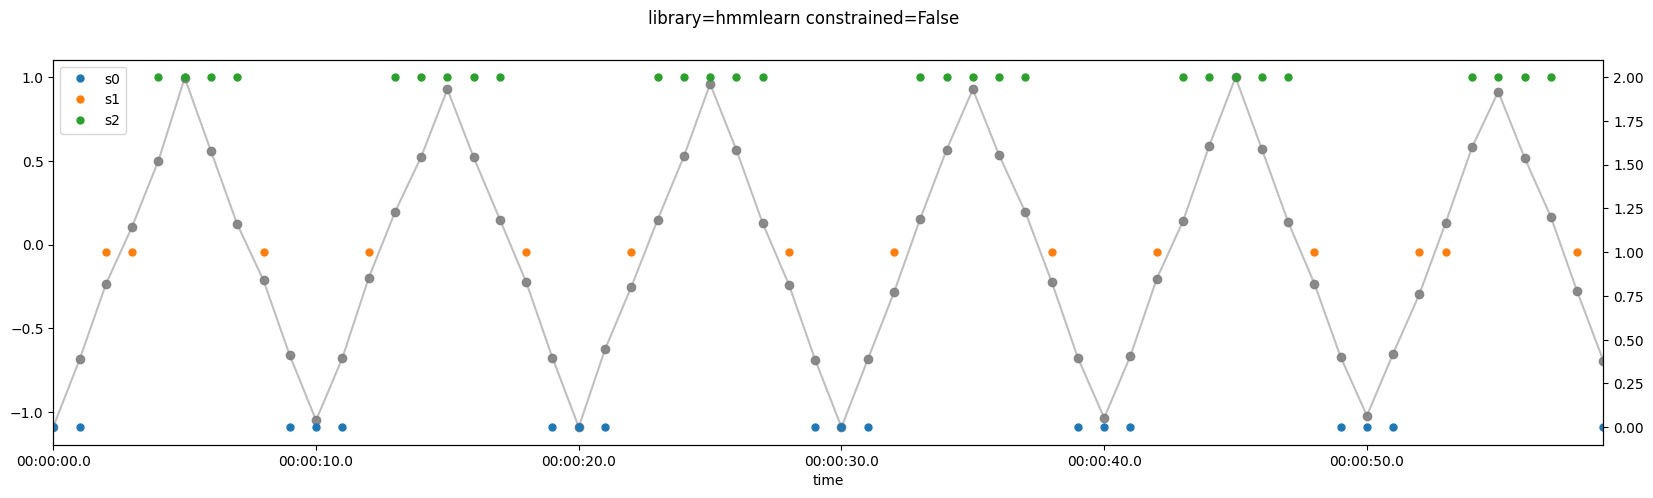

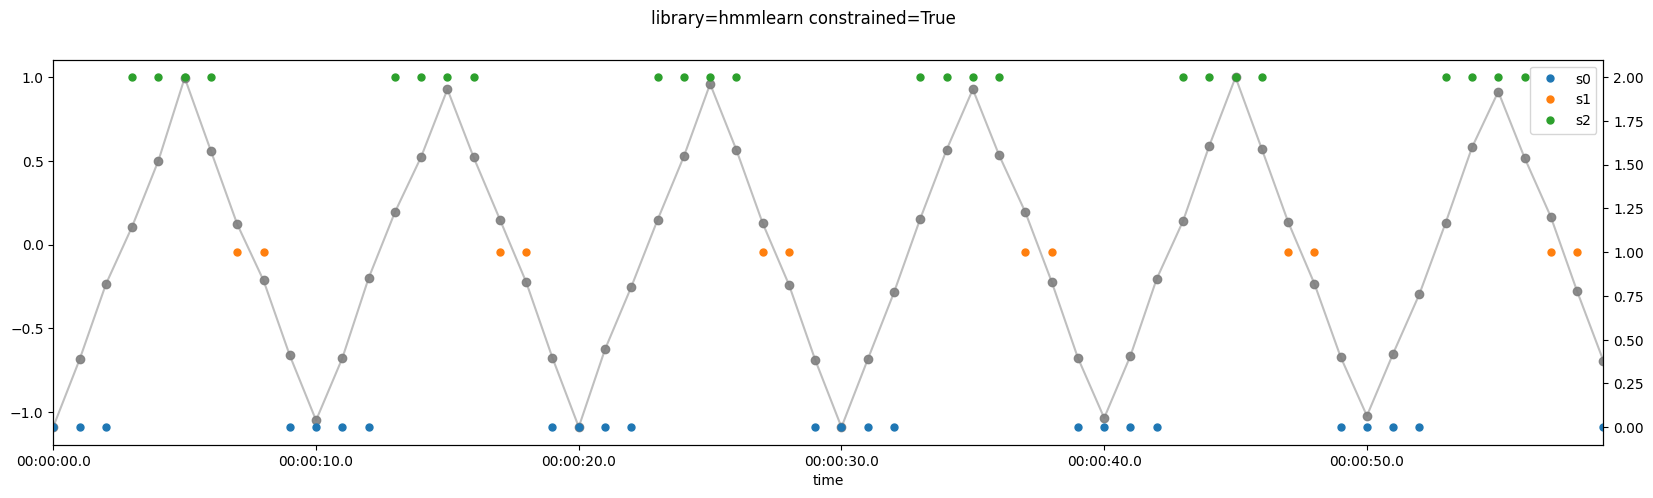

In [215]:
import hmmlearn.hmm

class ConstrainedGaussianHMM(hmmlearn.hmm.GaussianHMM):
    def _do_mstep(self, stats):
        
        # do the standard HMM learning step
        super()._do_mstep(stats)
        
        # find which states are where
        # we name them based on their typical value
        m = numpy.squeeze(self.means_)
        s = numpy.argsort(m)
        s1, s2, s3 = s
        
        # constrain the transition matrix
        # disallow s1->s2 and/or s2->s3 is not allowed
        self.transmat_[s1,s2] = 0.0
        self.transmat_[s2,s3] = 0.0


def format_sequence_hmmlearn(s):
    return s.values.reshape(-1, 1)

def test_hmmlearn_model(X, constrain):
    
    # Chose model
    if constrain:
        Model = ConstrainedGaussianHMM
    else:
        Model = hmmlearn.hmm.GaussianHMM

    model = Model(n_components=3, covariance_type='diag')
    model.fit(format_sequence_hmmlearn(X))

    # sort states based on their value
    mapping = numpy.argsort(numpy.squeeze(model.means_))
    inv_mapping = numpy.argsort(mapping)

    # Estimate states
    scores = model.score_samples(format_sequence_hmmlearn(X))[1]
    states = inv_mapping[numpy.argmax(scores, axis=1)]
    states = pandas.Series(states, index=X.index)

    # Visualize data and results
    plot_data(X, states=states, title=f'library=hmmlearn constrained={constrain}')

test_hmmlearn_model(X, constrain=False)
test_hmmlearn_model(X, constrain=True)
    
#print(states)

## Pomegranate implementation

tt [[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
tt [[0. 

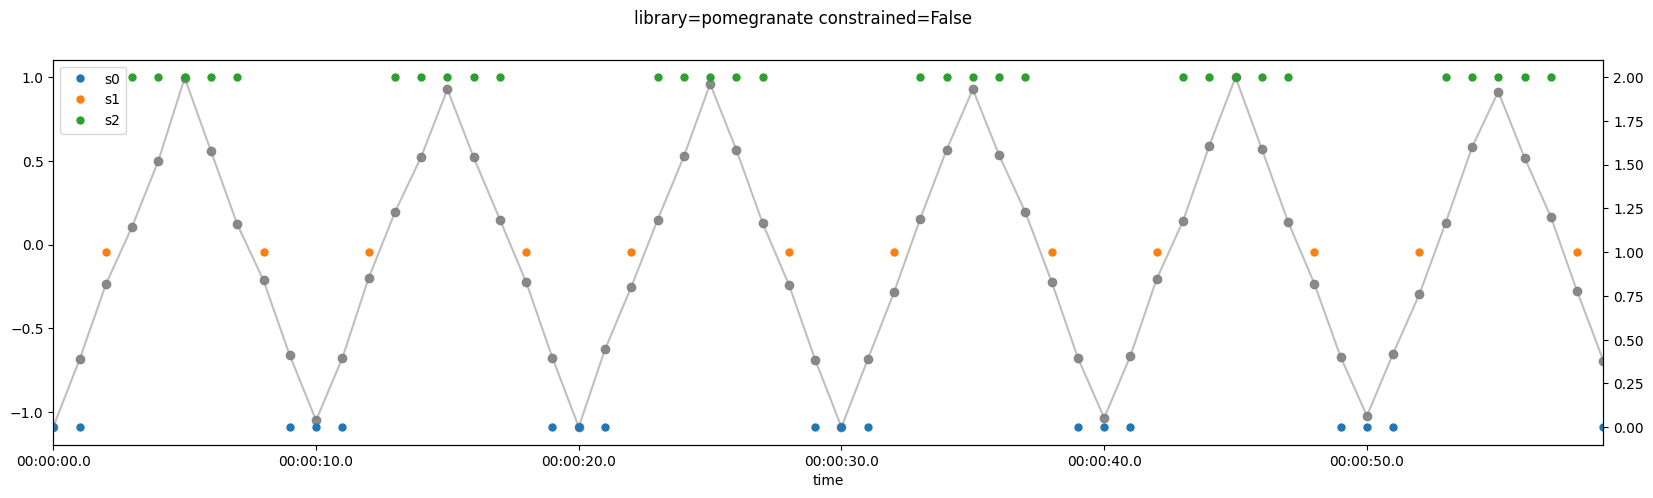

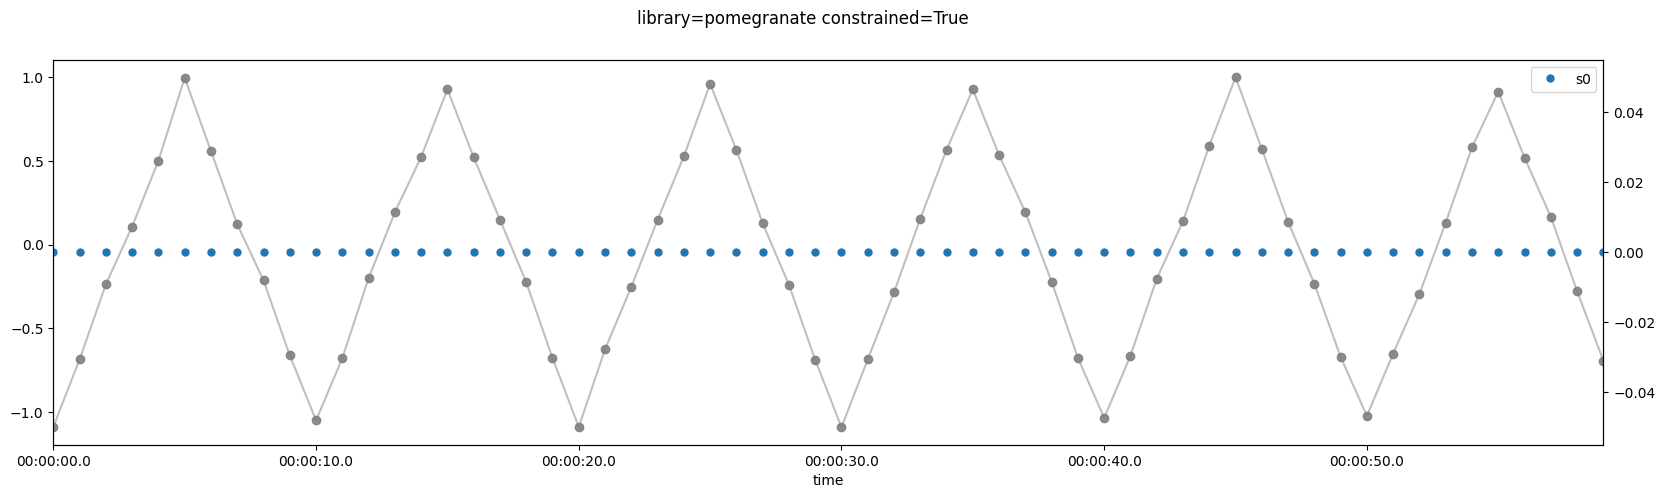

In [264]:
import pomegranate
    
def contrained_learn_from_samples(distribution,
                n_components=5,
                X=None,
                callbacks=[],
                constraints=None,
                max_iterations=100,
                *args, **kwargs):
    """
    Convenience wrapper around pomegranate.HiddenMarkovModel.from_samples
    
    As of September 2022, there is no way to use the standard pomegranate from_samples
    and impose constraints, because the transition matrix is not accessible in Python.
    
    To work around this, we implement the training loop ourselves, and create a new HiddenMarkovModel
    that starts where the previous training iteration
    https://github.com/jmschrei/pomegranate/issues/9#issuecomment-105169733    
    """
    
    assert constraints, "Must specify a constraining function"

    from pomegranate import HiddenMarkovModel

    # NOTE: stupid initialization, should cluster with k-means and fit
    # NOTE: hardcoded distribution type
    distributions = [ distribution(0, 1) for n in range(n_components) ]
    
    starts = numpy.ones(shape=n_components)
    ends = numpy.ones(shape=n_components)

    transition_matrix = numpy.ones(shape=(n_components, n_components)) / n_components

    # NOTE, no other stopping criteria implemented
    for iteration in range(max_iterations): 
        
        print('tt', transition_matrix)
        
        # create a new model with currently learned parameters
        model = HiddenMarkovModel.from_matrix(transition_matrix,
                                              distributions,
                                              starts=starts,
                                              ends=ends)
        model.bake()
        
        #print('before train \n', get_parameters(model))
        
        # Do HMM trainin step
        model.fit(X, max_iterations=2)

        # Get computed transitions, and apply constraints
        expected_transitions, _ = model.forward_backward(X)
        
        # hide internal states like start/end
        #print(expected_transitions)
        t = expected_transitions[0:n_components, 0:n_components]

        transition_matrix = constraints(model, t)
        
        # FIXME: also move across start/end probabilities
        # FIXME: check if distributions need to be carried across also
    
        #print('after train \n', get_parameters(model))
    
    return model



def constrain_tristate_up(model, transitions):
    #print(transitions)
    
    return transitions
    
def test_pomegranate_model(X, constrain):
    import functools
    from pomegranate import HiddenMarkovModel
    
    # Chose model
    if constrain:
        learn_from_samples = functools.partial(contrained_learn_from_samples, constraints=constrain_tristate_up)
    else:
        learn_from_samples = HiddenMarkovModel.from_samples

    model = learn_from_samples(distribution=pomegranate.NormalDistribution, X=[X], n_components=3)
        
    means = get_parameters(model)['mean']
    
    # sort states based on their value
    mapping = numpy.argsort(means)
    inv_mapping = numpy.argsort(mapping)

    # Estimate states
    
    #scores = model.predict(X, algorithm='map')
    scores = model.predict_proba(X)
    #print(scores)
    states = inv_mapping[numpy.argmax(scores, axis=1)].values
    states = pandas.Series(states, index=X.index)

    # Visualize data and results
    plot_data(X, states=states, title=f'library=pomegranate constrained={constrain}')

test_pomegranate_model(X, constrain=False)
test_pomegranate_model(X, constrain=True)

In [217]:

def get_parameters(model):
    parameters = dict(
        name = [],
        mean = [],
        std = [],
    )
    
    for s in model.states:
        if not s.name.startswith('s'):
            # skip start/end state
            continue

        mean, std = s.distribution.parameters
        parameters['mean'].append(mean)
        parameters['std'].append(std)
        parameters['name'].append(s.name)
            
    df = pandas.DataFrame(parameters).set_index('name')
    return df

get_parameters(model)

AttributeError: 'ConstrainedGMMHMM' object has no attribute 'states'